<a href="https://colab.research.google.com/github/aryan-at-ul/customer_segmentation/blob/main/customer_segmentation_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
data_path = "/content/drive/MyDrive/customer_segmentation/segmentation data.csv"

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
import os 
import pandas as pd
import scipy 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle
#sns skin on matplotlib
sns.set()

In [6]:
df_segmentation = pd.read_csv(data_path,index_col = 0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
#correlation estimation pearson correlation
df_segmentation.corr() 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


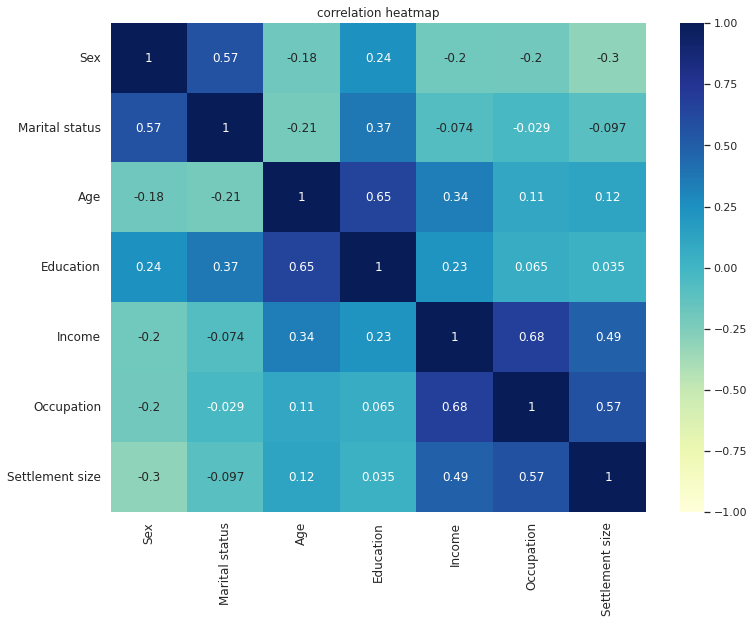

In [9]:
plt.figure(figsize= (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'YlGnBu',#autum, viridis , RdBu, YlGnBu
                vmin = -1,
                vmax = 1) 

s.set_yticklabels(s.get_yticklabels(),rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize = 12)

plt.title("correlation heatmap")
plt.show()

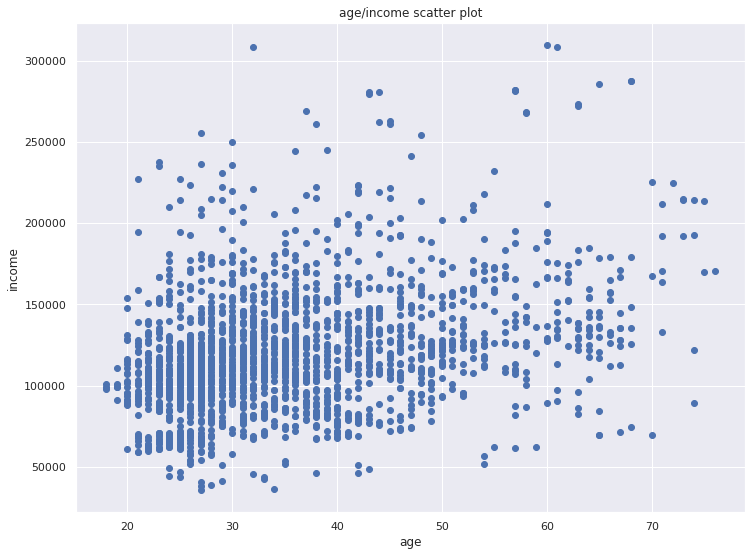

In [10]:
# a scatter plot between 2 observed features 
plt.figure(figsize= (12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('age')
plt.ylabel('income')
plt.title('age/income scatter plot')
plt.show()

In [11]:
#standardistation of data
#mapping all feature to same scale, to give them all same prority when sent to model.

scalar = StandardScaler()
segmentation_std = scalar.fit_transform(df_segmentation)

segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

 different types of clustering, grouping similar observations 

hierarchial and flat clustering

 hierarchial clusters - 

 1. top down (divising)
 
 2. bottom up (aggloerative) 

measuring distance between observation : open to explore >

![distance measure](http://www.dim.uchile.cl/~chermosilla/CVV/Metric%20Spaces%20-%20Searc%F3id.pdf?fbclid=IwAR2tIZw1BUkXy20egubD2kbmu6Xe9JGfd3naCflpGdVM5xPvPiNBBbli6dE)


In [12]:
#hierarchial cluster

hier_clust = linkage(segmentation_std, method = 'ward')

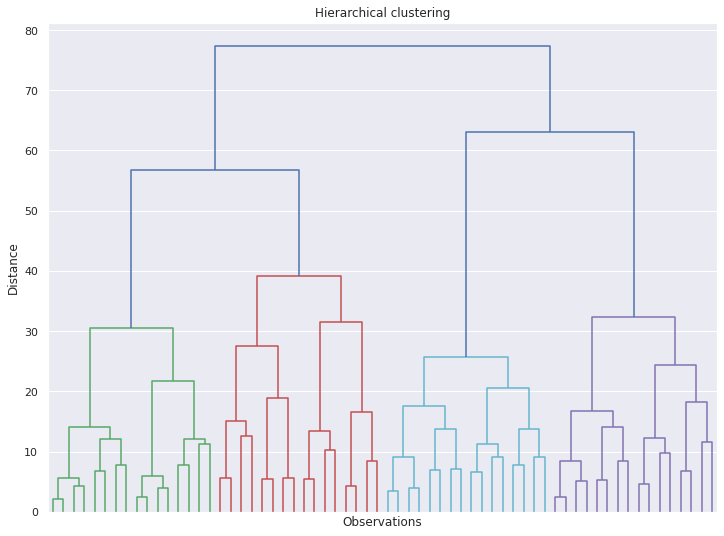

In [13]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5, #last 5 merged clusters
           show_leaf_counts = False,
           no_labels = True)
           #color_threshold = 0)

plt.show()

K-means clustering, this mehtods is something similar to vector quantization. (one need to choose the number of clusters from the begining) ** not sure maybe, vector quantization is cometivitve approach, rest is much the same. something like SOMs

this method is bad when it comes to outliers in data, one can perform k-medeian clustering but could be computationally expensive. 

==========================source VQ=========================
![vector quantization](https://arxiv.org/pdf/1509.07093.pdf)

===========================================================

in general good enough.



[]

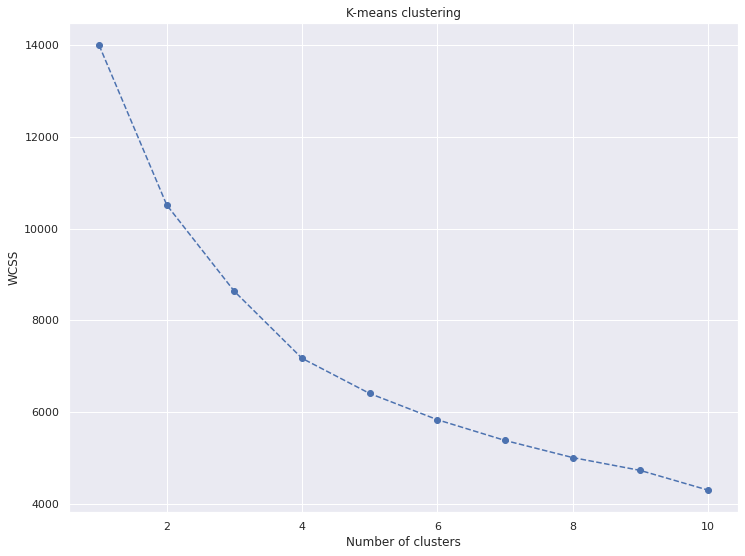

In [14]:
# k means 
#wcss for comparing differnt cluster models, for best clustering solutions 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12,9))
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering')
plt.plot()

In [15]:
# we use elbow method to choose number of cluser, here k = 4 seems like modes for above plot

k_means = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [16]:
k_means.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [17]:
df_segmentation_kmans = df_segmentation.copy()
df_segmentation_kmans['Segment K-means'] = k_means.labels_

In [18]:
df_segmentation_analysis = df_segmentation_kmans.groupby(['Segment K-means']).mean()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [19]:
#cheking size of cluster and their proportion when compared with entire dataset 

df_segmentation_analysis['N observation'] = df_segmentation_kmans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segmentation_analysis['proportation observation'] = df_segmentation_analysis['N observation'] / df_segmentation_analysis['N observation'].sum()


In [20]:
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N observation,proportation observation
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [21]:
df_segmentation_analysis.rename({
    0:'well-off',
    1:'fewer-opportunities',
    2:'standard',
    3:'career focused'

})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N observation,proportation observation
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [22]:
#plotting raw data with clusters

df_segmentation_kmans['Labels'] = df_segmentation_kmans['Segment K-means'].map({
    0:'well-off',
    1:'fewer-opportunities',
    2:'standard',
    3:'career focused'
})
df_segmentation_kmans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,2,standard
100000003,0,0,49,1,89210,0,0,1,fewer-opportunities
100000004,0,0,45,1,171565,1,1,3,career focused
100000005,0,0,53,1,149031,1,1,3,career focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer-opportunities
100001997,1,1,27,1,117744,1,0,2,standard
100001998,0,0,31,0,86400,0,0,1,fewer-opportunities


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Segmentation using K-means')

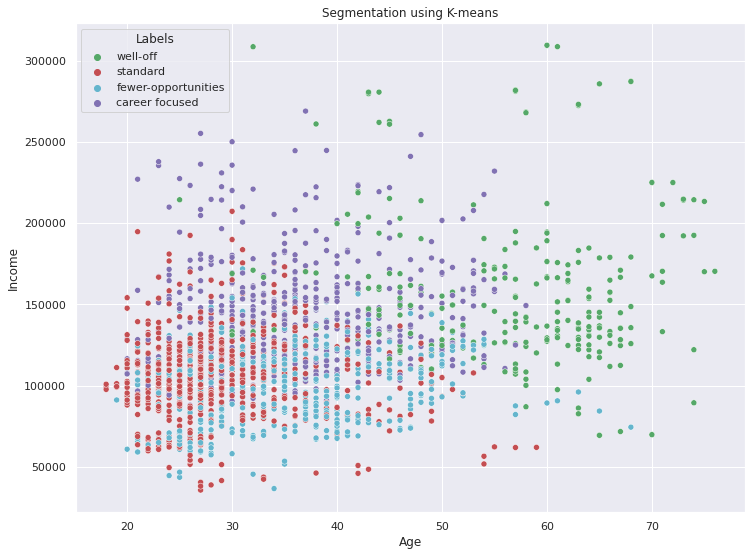

In [23]:
x_axis = df_segmentation_kmans['Age']
y_axis = df_segmentation_kmans['Income']

plt.figure(figsize = (12,9))
sns.scatterplot(x_axis,y_axis, hue = df_segmentation_kmans['Labels'], palette = ['g','r','c','m'])
plt.title('Segmentation using K-means')


In [24]:
pca = PCA()
pca.fit(segmentation_std)

pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

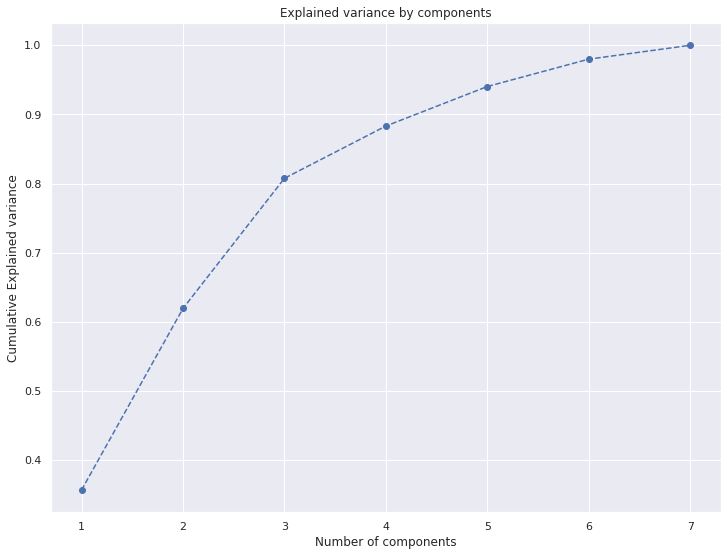

In [25]:
#pick most prominent component based on high varience
plt.figure(figsize = (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

#keep 70-80 % of variance so 3 or 4 for this data

In [26]:
pca = PCA(n_components= 3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [27]:
# results

# pca.components_ #loadings ,, corrilations b/w original variable and component

df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1','Component 2','Component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7f2be51db790>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

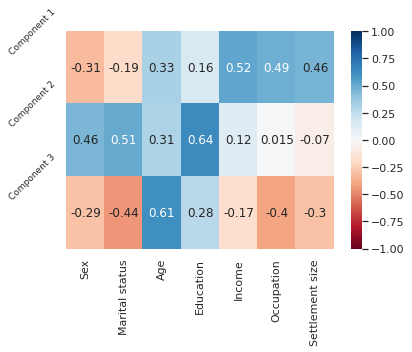

In [28]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1, 
            annot = True,
            cmap = 'RdBu')
plt.yticks([0,1,2],
           ['Component 1','Component 2','Component 3'],
           rotation = 45,
           fontsize = 9)


In [29]:
score_pca = pca.transform(segmentation_std) #pca score
score_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

[]

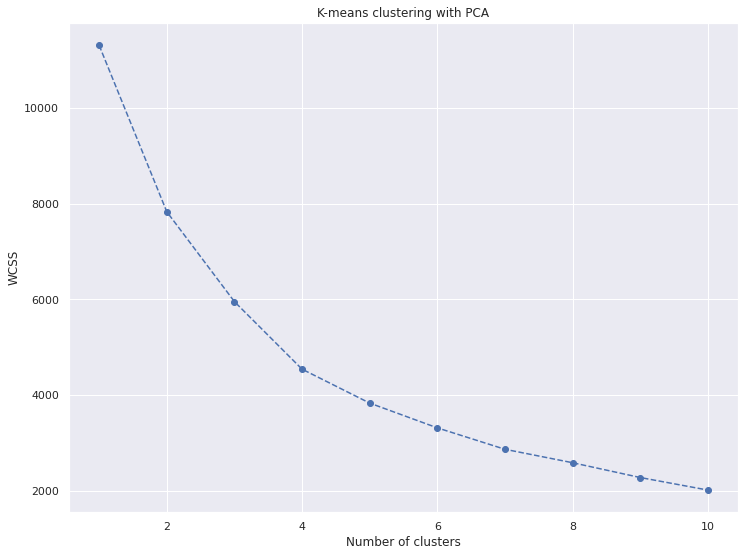

In [30]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (12,9))
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering with PCA')
plt.plot()

#k remains 4

In [31]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [32]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

In [33]:
# results of segmentation model with pca
df_seg_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True),pd.DataFrame(score_pca)],axis = 1)
df_seg_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Component 3']

df_seg_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [34]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_seg_pca_kmeans_freq #career, education lifestyle, experience

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [35]:
df_seg_pca_kmeans_freq['N observations'] = df_seg_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_seg_pca_kmeans_freq['Proportion of Observations'] = df_seg_pca_kmeans_freq['N observations'] / df_seg_pca_kmeans_freq['N observations'].sum()

df_seg_pca_kmeans_freq = df_seg_pca_kmeans_freq.rename({
    0: 'standard',
    1: 'career focused',
    2: 'fewer opportunities',
    3: 'well-off'
})

df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N observations,Proportion of Observations
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [36]:
#visualization of clusters 

df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment K-means PCA'].map({
    0: 'standard',
    1: 'career focused',
    2: 'fewer opportunities',
    3: 'well-off'
})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


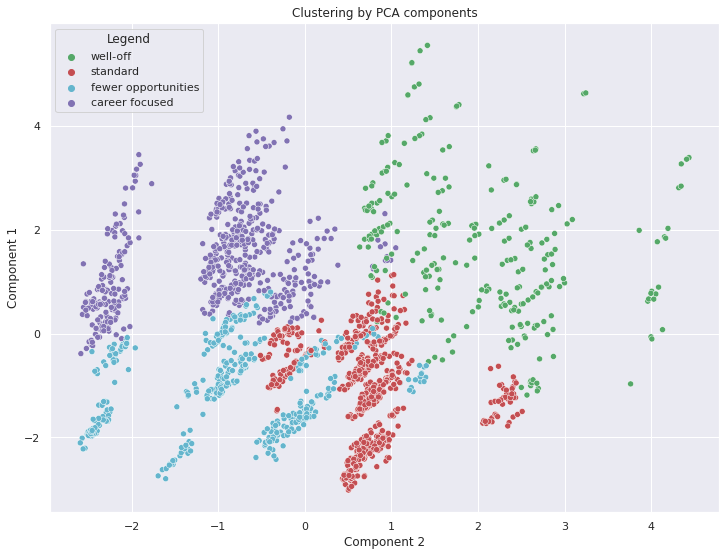

In [37]:
#ploting  2 vs 1
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (12,9))

sns.scatterplot(x_axis,y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clustering by PCA components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


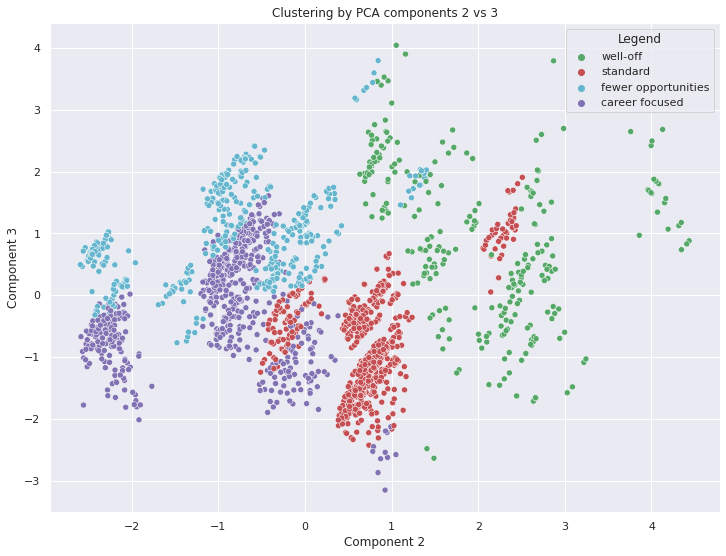

In [38]:
#ploting  not good anyways 
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 3']
plt.figure(figsize = (12,9))

sns.scatterplot(x_axis,y_axis, hue = df_seg_pca_kmeans['Legend'], palette = ['g','r','c','m'])
plt.title('Clustering by PCA components 2 vs 3')
plt.show()

In [39]:
#saving out model

# we need our scalar , pca and kmeans pca 
pickle.dump(scalar,open('scalar.pickle','wb'))

In [40]:
pickle.dump(pca,open('pca.pickle','wb'))

In [41]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))

#Purchase Analytics 

In [42]:
data_path = "/content/drive/MyDrive/customer_segmentation/purchase data.csv"

In [45]:
df_purchase = pd.read_csv(data_path)

df_purchase.isnull().sum()
# do imputation for missing if any

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [46]:
#importing segmentation modes
# 1. standardize -> pca -> k-means pca

scalar = pickle.load(open('/content/scalar.pickle','rb'))
pca = pickle.load(open('/content/pca.pickle','rb'))
kmeans_pca = pickle.load(open('/content/kmeans_pca.pickle','rb'))


In [49]:
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]

df_purchase_seg_std = scalar.transform(features)
df_purchase_seg_std

array([[-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       ...,
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01]])

In [50]:
# PCA on standardized features

df_purchase_seg_pca = pca.transform(df_purchase_seg_std)

In [53]:
# k means pca 
purchase_seg_kmeans_pca = kmeans_pca.predict(df_purchase_seg_pca)
purchase_seg_kmeans_pca

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [54]:
df_purchase_predictor = df_purchase.copy()
purchase_seg_kmeans_pca = kmeans_pca.predict(df_purchase_seg_pca)
df_purchase_predictor['Segment'] = purchase_seg_kmeans_pca

In [55]:
df_purchase_predictor.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [57]:
temp1 = df_purchase_predictor[['ID',"Incidence"]].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


some descriptive over purchase segments

In [58]:
temp2 = df_purchase_predictor[['ID',"Incidence"]].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'N_Purchaces'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchaces
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [73]:
temp3['Average_N_Purchaces'] = temp3['N_Purchaces'] / temp3['N_Visits']

In [74]:
temp4 = df_purchase_predictor[['ID',"Segment"]].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr.head()

,N_Visits,N_Purchaces,Average_N_Purchaces,Segment
ID,,,,
200000001,101,9,0.089109,2.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,2.0
200000004,85,11,0.129412,2.0
200000005,111,13,0.117117,1.0


In [75]:
# segment proportation of purchases by segment 
seg_prop = df_purchase_descr[['N_Purchaces','Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
seg_prop = seg_prop.rename(columns = {'N_Purchaces':'Segment Proportions'})
seg_prop.head()

,Segment Proportions
Segment,
0.0,0.206
1.0,0.220
2.0,0.378
3.0,0.196


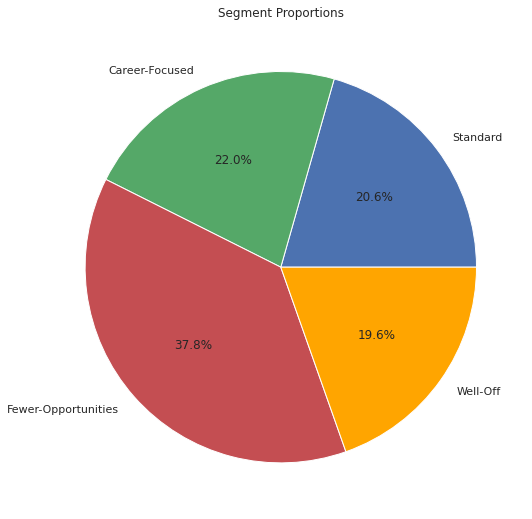

In [76]:
plt.figure(figsize = (12,9))
plt.pie(seg_prop['Segment Proportions'],labels = ['Standard','Career-Focused','Fewer-Opportunities','Well-Off'],autopct = '%1.1f%%',
        colors = ['b','g','r','orange'])

plt.title("Segment Proportions")
plt.show()


In [78]:
#purchase occasion and purchacse incidences 

segment_mean = df_purchase_descr.groupby(['Segment']).mean()
segment_mean

,N_Visits,N_Purchaces,Average_N_Purchaces
Segment,,,
0.0,117.699029,24.902913,0.212773
1.0,123.454545,39.827273,0.283102
2.0,113.730159,22.756614,0.201588
3.0,117.295918,34.602041,0.284478


In [79]:
segment_std = df_purchase_descr.groupby(['Segment']).std()
segment_std

,N_Visits,N_Purchaces,Average_N_Purchaces
Segment,,,
0.0,19.039605,16.774464,0.126603
1.0,44.864656,53.744530,0.200056
2.0,16.410498,13.815040,0.120335
3.0,20.716152,25.900579,0.171787


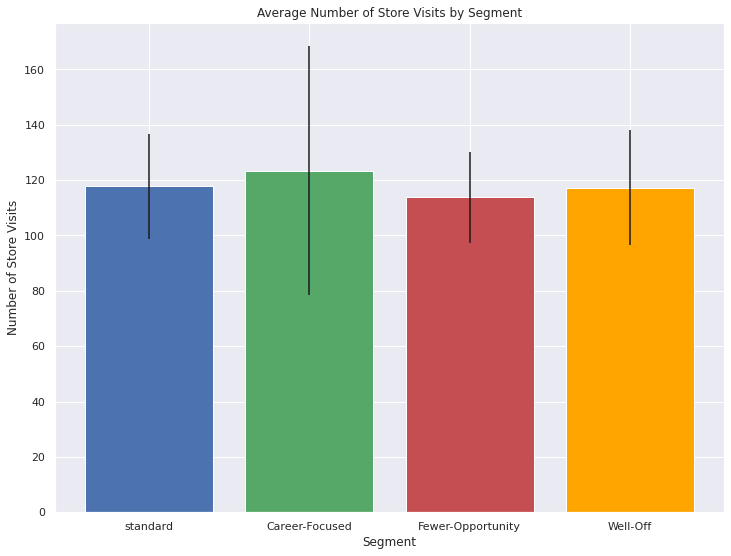

In [80]:
plt.figure(figsize = (12,9))
plt.bar(x = (0,1,2,3),
        tick_label = ('standard','Career-Focused','Fewer-Opportunity','Well-Off'),
        height = segment_mean['N_Visits'],
        yerr = segment_std['N_Visits'],
        color = ('b','g','r','orange'))

plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')
plt.show()

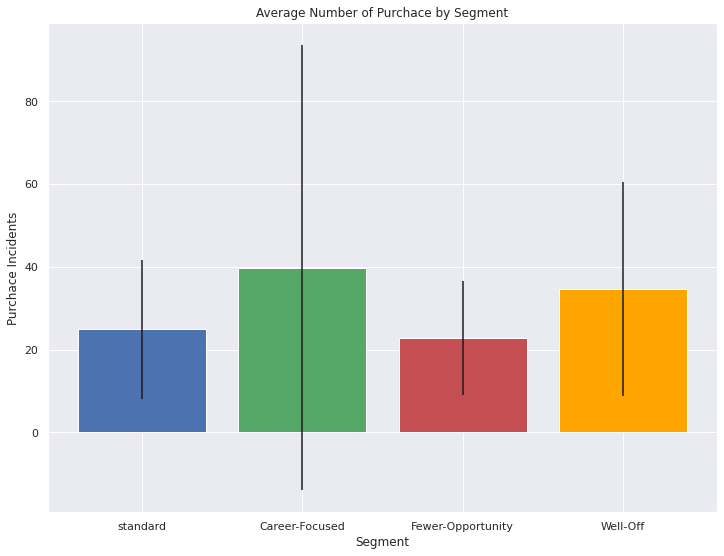

In [81]:
plt.figure(figsize = (12,9))
plt.bar(x = (0,1,2,3),
        tick_label = ('standard','Career-Focused','Fewer-Opportunity','Well-Off'),
        height = segment_mean['N_Purchaces'],
        yerr = segment_std['N_Purchaces'],
        color = ('b','g','r','orange'))

plt.xlabel('Segment')
plt.ylabel('Purchace Incidents')
plt.title('Average Number of Purchace by Segment')
plt.show()

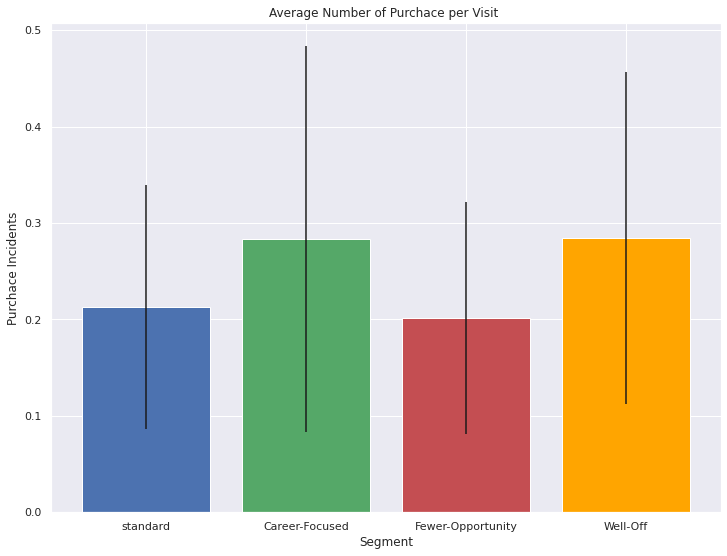

In [82]:
plt.figure(figsize = (12,9))
plt.bar(x = (0,1,2,3),
        tick_label = ('standard','Career-Focused','Fewer-Opportunity','Well-Off'),
        height = segment_mean['Average_N_Purchaces'],
        yerr = segment_std['Average_N_Purchaces'],
        color = ('b','g','r','orange'))

plt.xlabel('Segment')
plt.ylabel('Purchace Incidents')
plt.title('Average Number of Purchace per Visit')
plt.show()

In [83]:
# brand choice 
df_purchase_incidents = df_purchase_predictor[df_purchase_predictor['Incidence'] == 1]

brand_dummies = pd.get_dummies(df_purchase_incidents['Brand'],prefix = 'Brand',prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidents['Segment'],df_purchase_incidents['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [85]:
temp = brand_dummies.groupby(['ID'],as_index = True).mean()
mean_brand_choice = temp.groupby(['Segment'],as_index = True).mean()


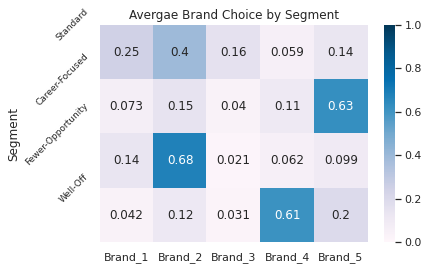

In [87]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0,1,2,3],['Standard','Career-Focused','Fewer-Opportunity','Well-Off'],rotation = 45, fontsize = 9)
plt.title('Avergae Brand Choice by Segment')
plt.show()

In [92]:
# revenue by segment 
temp = df_purchase_incidents[df_purchase_incidents['Brand'] == 1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segment_brand_revenue = pd.DataFrame()
segment_brand_revenue[['Segment','Revenue Brand 1']] = temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index = False).sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [93]:
temp = df_purchase_incidents[df_purchase_incidents['Brand'] == 2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 2']] = temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index = False).sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [94]:
temp = df_purchase_incidents[df_purchase_incidents['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index = False).sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [95]:
temp = df_purchase_incidents[df_purchase_incidents['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index = False).sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [96]:
temp = df_purchase_incidents[df_purchase_incidents['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segment_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index = False).sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [99]:
segment_brand_revenue['Total Revenue'] = (segment_brand_revenue['Revenue Brand 1'] + 
                                          segment_brand_revenue['Revenue Brand 2'] +
                                          segment_brand_revenue['Revenue Brand 3'] +
                                          segment_brand_revenue['Revenue Brand 4'] +
                                          segment_brand_revenue['Revenue Brand 5'] )

segment_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [100]:
segment_brand_revenue['Segment Proportion'] = seg_prop['Segment Proportions']
segment_brand_revenue['Segment'] = segment_brand_revenue['Segment'].map({
    0:'Standard',
    1:'Career-Focused',
    2:'Fewer-Opportunity',
    3:'Well-Off'
})

segment_brand_revenue = segment_brand_revenue.set_index(['Segment'])
segment_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportion
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunity,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
